In [1]:
#loading the libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("bike_sharing.csv")
df

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2011       1   0     1        0        6           0   
1          2  02-01-2011       1   0     1        0        0           0   
2          3  03-01-2011       1   0     1        0        1           1   
3          4  04-01-2011       1   0     1        0        2           1   
4          5  05-01-2011       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  27-12-2012       1   1    12        0        4           1   
727      728  28-12-2012       1   1    12        0        5           1   
728      729  29-12-2012       1   1    12        0        6           0   
729      730  30-12-2012       1   1    12        0        0           0   
730      731  31-12-2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [3]:
df.shape

(731, 16)

In [4]:
#EDA process
df.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2011       1   0     1        0        6           0   
1        2  02-01-2011       1   0     1        0        0           0   
2        3  03-01-2011       1   0     1        0        1           1   
3        4  04-01-2011       1   0     1        0        2           1   
4        5  05-01-2011       1   0     1        0        3           1   
5        6  06-01-2011       1   0     1        0        4           1   
6        7  07-01-2011       1   0     1        0        5           1   
7        8  08-01-2011       1   0     1        0        6           0   
8        9  09-01-2011       1   0     1        0        0           0   
9       10  10-01-2011       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
5           1  0.204348  0.233209  0.518261   0.089565      88        1518   
6           2  0.196522  0.208839  0.498696   0.168726     148        1362   
7           2  0.165000  0.162254  0.535833   0.266804      68         891   
8           1  0.138333  0.116175  0.434167   0.361950      54         768   
9           1  0.150833  0.150888  0.482917   0.223267      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [5]:
df.tail(20)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
711      712  12-12-2012       4   1    12        0        3           1   
712      713  13-12-2012       4   1    12        0        4           1   
713      714  14-12-2012       4   1    12        0        5           1   
714      715  15-12-2012       4   1    12        0        6           0   
715      716  16-12-2012       4   1    12        0        0           0   
716      717  17-12-2012       4   1    12        0        1           1   
717      718  18-12-2012       4   1    12        0        2           1   
718      719  19-12-2012       4   1    12        0        3           1   
719      720  20-12-2012       4   1    12        0        4           1   
720      721  21-12-2012       1   1    12        0        5           1   
721      722  22-12-2012       1   1    12        0        6           0   
722      723  23-12-2012       1   1    12        0        0           0   
723      724  24-12-2012       1   1    12        0        1           1   
724      725  25-12-2012       1   1    12        1        2           0   
725      726  26-12-2012       1   1    12        0        3           1   
726      727  27-12-2012       1   1    12        0        4           1   
727      728  28-12-2012       1   1    12        0        5           1   
728      729  29-12-2012       1   1    12        0        6           0   
729      730  30-12-2012       1   1    12        0        0           0   
730      731  31-12-2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
711           2  0.297500  0.297338  0.538333   0.162937     310        5009   
712           1  0.295833  0.294188  0.485833   0.174129     425        5107   
713           1  0.281667  0.294192  0.642917   0.131229     429        5182   
714           1  0.324167  0.338383  0.650417   0.106350     767        4280   
715           2  0.362500  0.369938  0.838750   0.100742     538        3248   
716           2  0.393333  0.401500  0.907083   0.098258     212        4373   
717           1  0.410833  0.409708  0.666250   0.221404     433        5124   
718           1  0.332500  0.342162  0.625417   0.184092     333        4934   
719           2  0.330000  0.335217  0.667917   0.132463     314        3814   
720           2  0.326667  0.301767  0.556667   0.374383     221        3402   
721           1  0.265833  0.236113  0.441250   0.407346     205        1544   
722           1  0.245833  0.259471  0.515417   0.133083     408        1379   
723           2  0.231304  0.258900  0.791304   0.077230     174         746   
724           2  0.291304  0.294465  0.734783   0.168726     440         573   
725           3  0.243333  0.220333  0.823333   0.316546       9         432   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
711  5319  
712  5532  
713  5611  
714  5047  
715  3786  
716  4585  
717  5557  
718  5267  
719  4128  
720  3623  
721  1749  
722  1787  
723   920  
724  1013  
725   441  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [6]:
df.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df=pd.DataFrame(data=df)
df

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2011       1   0     1        0        6           0   
1          2  02-01-2011       1   0     1        0        0           0   
2          3  03-01-2011       1   0     1        0        1           1   
3          4  04-01-2011       1   0     1        0        2           1   
4          5  05-01-2011       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  27-12-2012       1   1    12        0        4           1   
727      728  28-12-2012       1   1    12        0        5           1   
728      729  29-12-2012       1   1    12        0        6           0   
729      730  30-12-2012       1   1    12        0        0           0   
730      731  31-12-2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [8]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [11]:
dfcor=df.corr()
dfcor

instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.248546  0.123006  0.054274  0.059923   
registered  0.659623  0.411623  0.594248  0.293488 -0.108745  0.057367   
cnt         0.628830  0.406100  0.566710  0.279977 -0.068348  0.067443   

            workingday  weathersit      temp     atemp       hum  windspeed  \
instant      -0.004337   -0.021477  0.150580  0.152638  0.016375  -0.112620   
season        0.012485    0.019211  0.334315  0.342876  0.205445  -0.229046   
yr           -0.002013   -0.048727  0.047604  0.046106 -0.110651  -0.011817   
mnth         -0.005901    0.043528  0.220205  0.227459  0.222204  -0.207502   
holiday      -0.253023   -0.034627 -0.028556 -0.032507 -0.015937   0.006292   
weekday       0.035790    0.031087 -0.000170 -0.007537 -0.052232   0.014282   
workingday    1.000000    0.061200  0.052660  0.052182  0.024327  -0.018796   
weathersit    0.061200    1.000000 -0.120602 -0.121583  0.591045   0.039511   
temp          0.052660   -0.120602  1.000000  0.991702  0.126963  -0.157944   
atemp         0.052182   -0.121583  0.991702  1.000000  0.139988  -0.183643   
hum           0.024327    0.591045  0.126963  0.139988  1.000000  -0.248489   
windspeed    -0.018796    0.039511 -0.157944 -0.183643 -0.248489   1.000000   
casual       -0.518044   -0.247353  0.543285  0.543864 -0.077008  -0.167613   
registered    0.303907   -0.260388  0.540012  0.544192 -0.091089  -0.217449   
cnt           0.061156   -0.297391  0.627494  0.631066 -0.100659  -0.234545   

              casual  registered       cnt  
instant     0.275255    0.659623  0.628830  
season      0.210399    0.411623  0.406100  
yr          0.248546    0.594248  0.566710  
mnth        0.123006    0.293488  0.279977  
holiday     0.054274   -0.108745 -0.068348  
weekday     0.059923    0.057367  0.067443  
workingday -0.518044    0.303907  0.061156  
weathersit -0.247353   -0.260388 -0.297391  
temp        0.543285    0.540012  0.627494  
atemp       0.543864    0.544192  0.631066  
hum        -0.077008   -0.091089 -0.100659  
windspeed  -0.167613   -0.217449 -0.234545  
casual      1.000000    0.395282  0.672804  
registered  0.395282    1.000000  0.945517  
cnt         0.672804    0.945517  1.000000

In [12]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

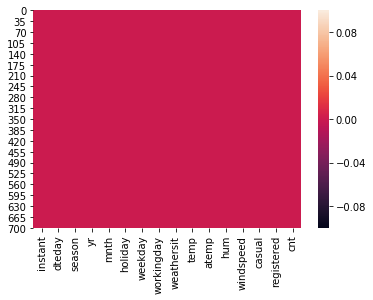

In [13]:
sns.heatmap(df.isnull())

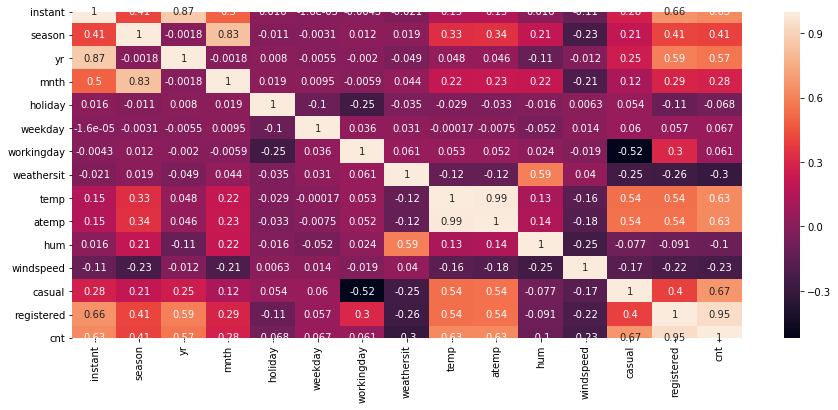

In [14]:
#ploting the values in heatmap
plt.figure(figsize=(15,6))
sns.heatmap(dfcor, color="blue",annot=True)

In [15]:
#Here we are going to delete dteday column because it is not going to be used to predict the count of total rental bikes 
#including both casual and registered
df.drop(['dteday'],axis=1,inplace=True)
df

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1        0        6           0           2   
1          2       1   0     1        0        0           0           2   
2          3       1   0     1        0        1           1           1   
3          4       1   0     1        0        2           1           1   
4          5       1   0     1        0        3           1           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
726      727       1   1    12        0        4           1           2   
727      728       1   1    12        0        5           1           2   
728      729       1   1    12        0        6           0           2   
729      730       1   1    12        0        0           0           1   
730      731       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  casual  registered   cnt  
0    0.344167  0.363625  0.805833   0.160446     331         654   985  
1    0.363478  0.353739  0.696087   0.248539     131         670   801  
2    0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3    0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4    0.226957  0.229270  0.436957   0.186900      82        1518  1600  
..        ...       ...       ...        ...     ...         ...   ...  
726  0.254167  0.226642  0.652917   0.350133     247        1867  2114  
727  0.253333  0.255046  0.590000   0.155471     644        2451  3095  
728  0.253333  0.242400  0.752917   0.124383     159        1182  1341  
729  0.255833  0.231700  0.483333   0.350754     364        1432  1796  
730  0.215833  0.223487  0.577500   0.154846     439        2290  2729  

[731 rows x 15 columns]

In [16]:
#checking the skewness

df.skew()

instant       0.000000
season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64

In [17]:
#to remove the skewness of dataset
import warnings
warnings.filterwarnings('ignore')
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    if df.skew().loc[col]<-0.55:
        df[col]=np.cbrt(df[col])
   

In [18]:
df.skew()

instant       0.000000
season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.759529
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.497220
casual       -1.633926
registered    0.043659
cnt          -0.047353
dtype: float64

In [19]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print("df.shape:",df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print("df1.shape:",df1.shape)


df.shape: (731, 15)
df1.shape: (702, 15)


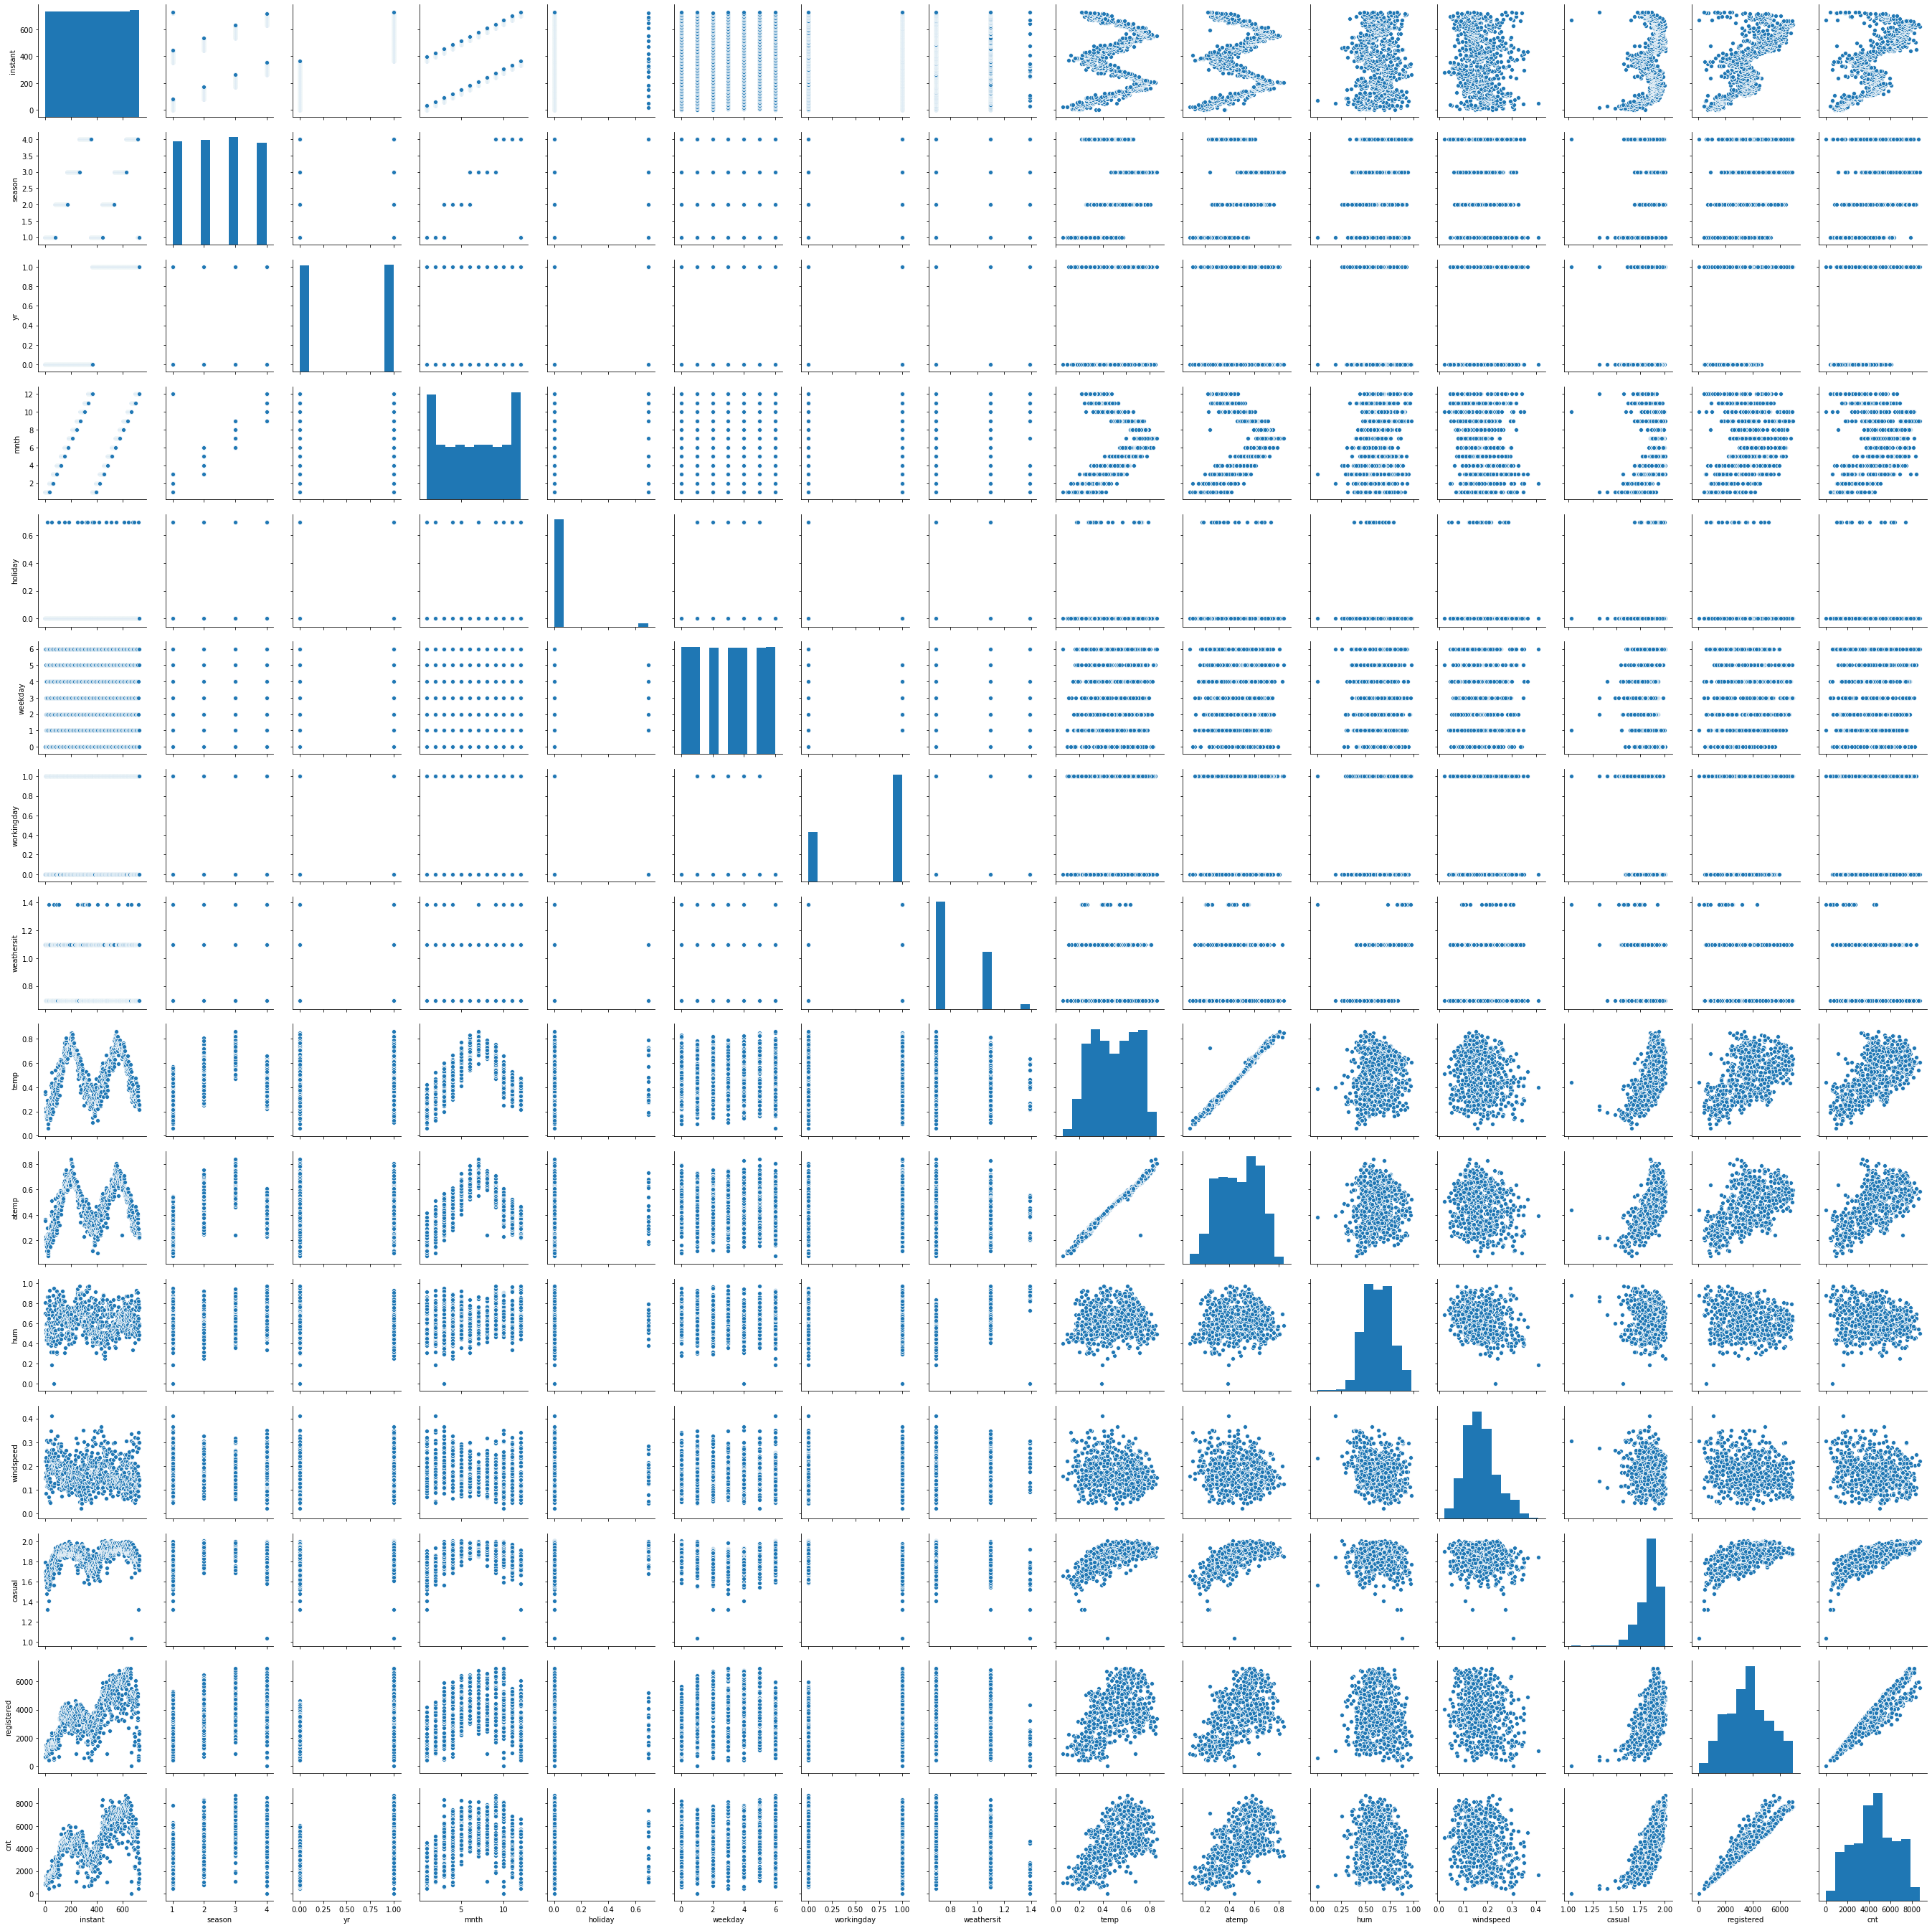

In [20]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(df)
plt.show()

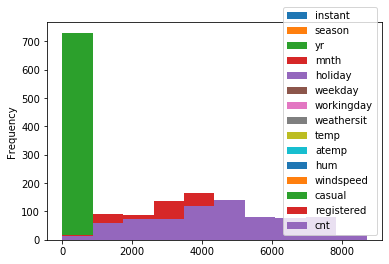

In [21]:
df.plot.hist()

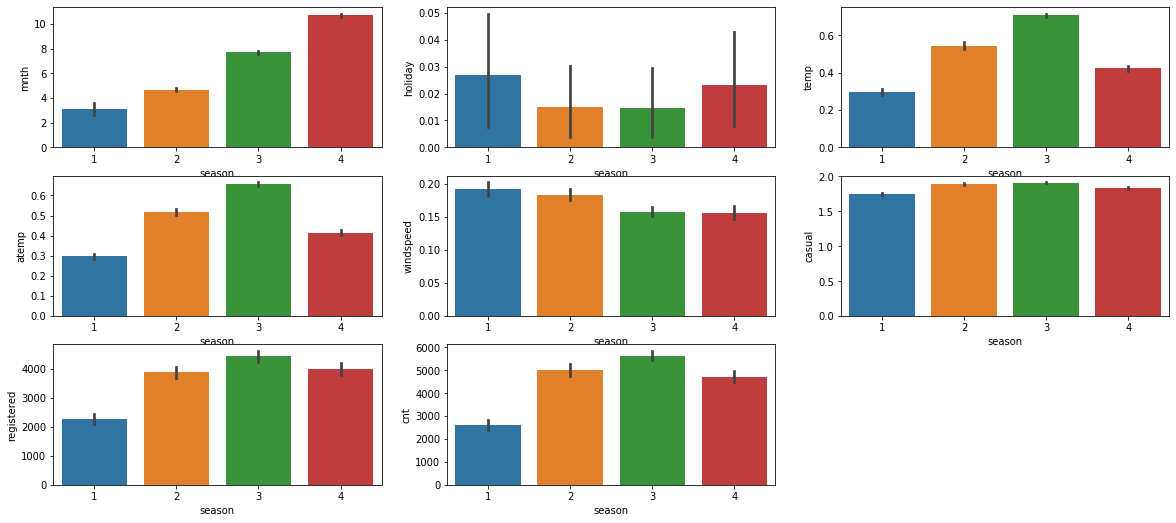

In [22]:
# creating bar plot of colums with respect to season to check distribution among season
season = df[['season','mnth','holiday','temp','atemp','windspeed','casual','registered','cnt']]
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(season.columns):
    if column == 'season':
        continue
    plt.subplot(5, 3, column_index)
    sns.barplot(x='season', y=column, data=df)

instant          AxesSubplot(0.125,0.657941;0.0731132x0.222059)
season        AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
yr            AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
mnth          AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
holiday       AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
weekday       AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
workingday    AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
weathersit    AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
temp          AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
atemp            AxesSubplot(0.125,0.391471;0.0731132x0.222059)
hum           AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
windspeed     AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
casual        AxesSubplot(0.388208,0.391471;0.0731132x0.222059)
registered    AxesSubplot(0.475943,0.391471;0.0731132x0.222059)
cnt           AxesSubplot(0.563679,0.391471;0.0731132x0.222059)
dtype: object

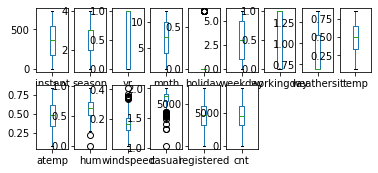

In [23]:
df.plot(kind='box',subplots=True,layout=(3,9))

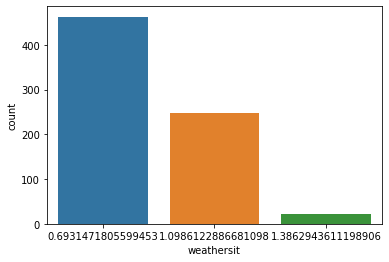

In [24]:
sns.countplot(df["weathersit"])

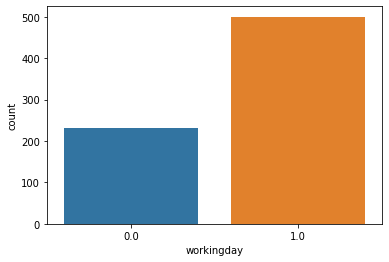

In [25]:
sns.countplot(df["workingday"])

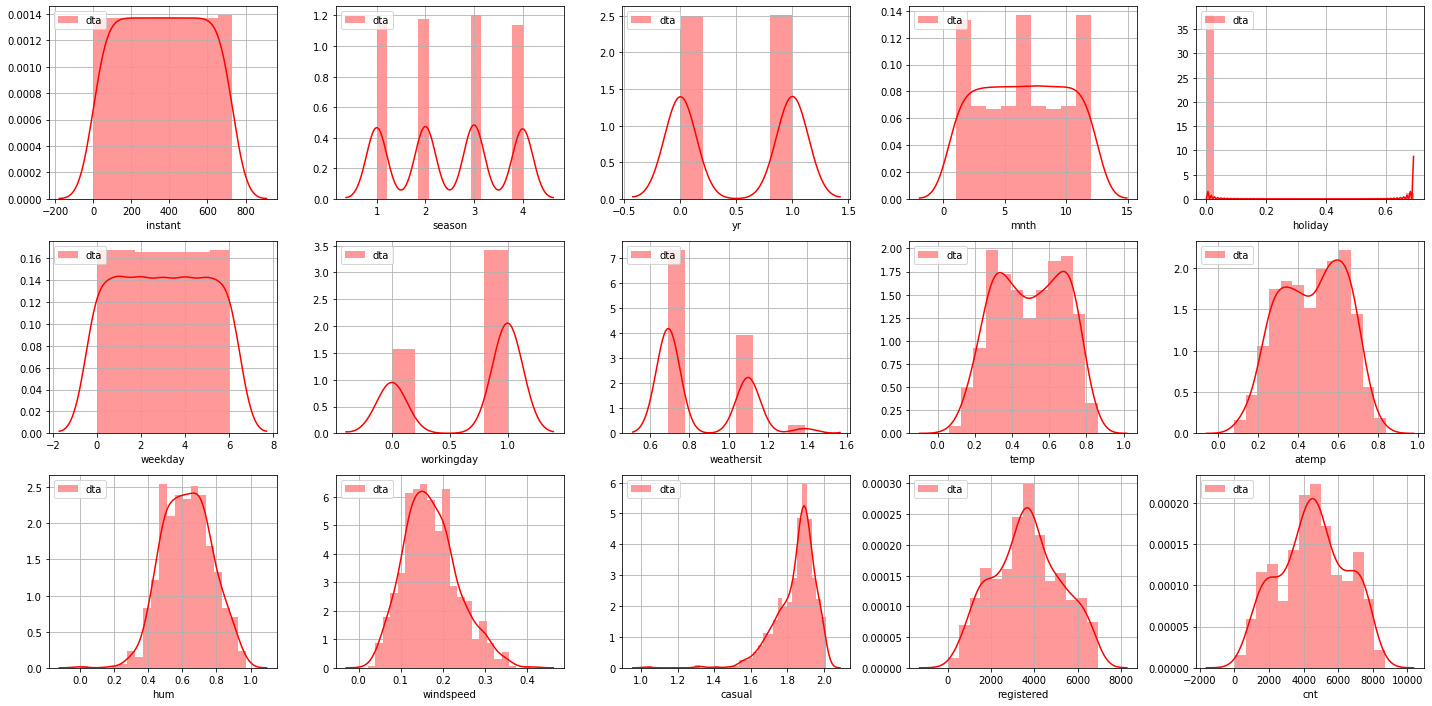

In [26]:
#ploting distplot through iteration
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='r',kde=True,label='dta')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

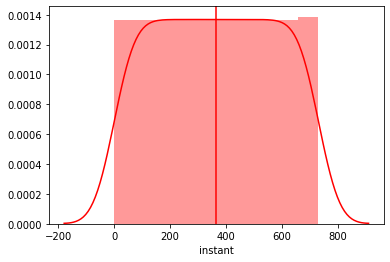

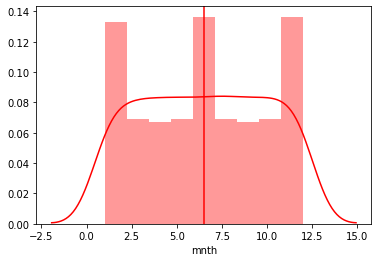

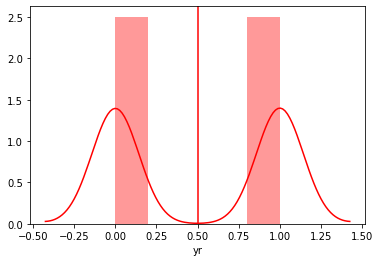

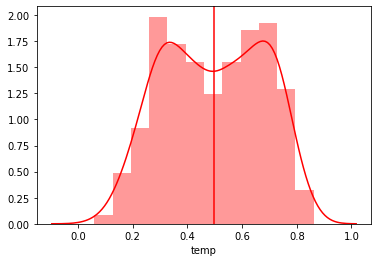

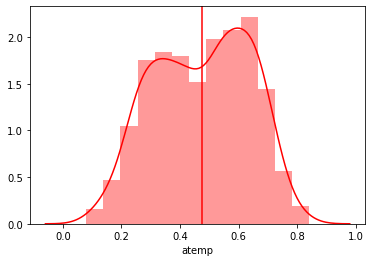

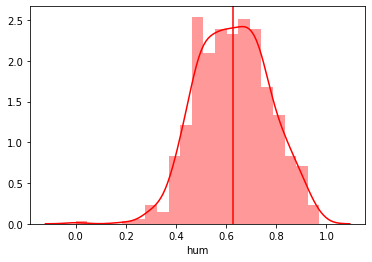

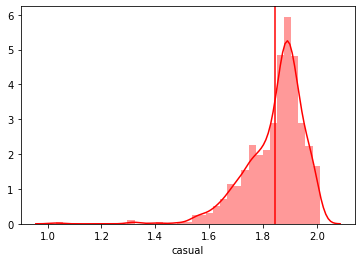

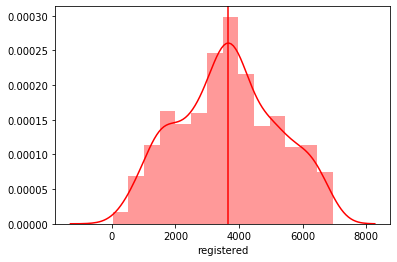

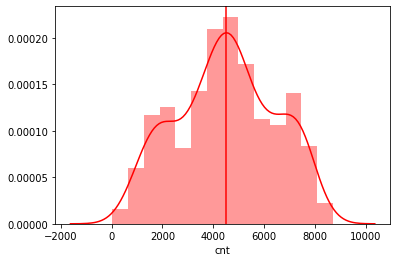

In [27]:
# Histogram - Distribution plot for all continous variables to visualize skewness
dist = df[['instant','mnth','yr','temp','atemp','hum','casual','registered','cnt']]
for i,col in enumerate(dist):
    plt.figure(i)
    plt.axvline(dist[col].mean(),color = 'r')
    sns.distplot(dist[col],color='red')

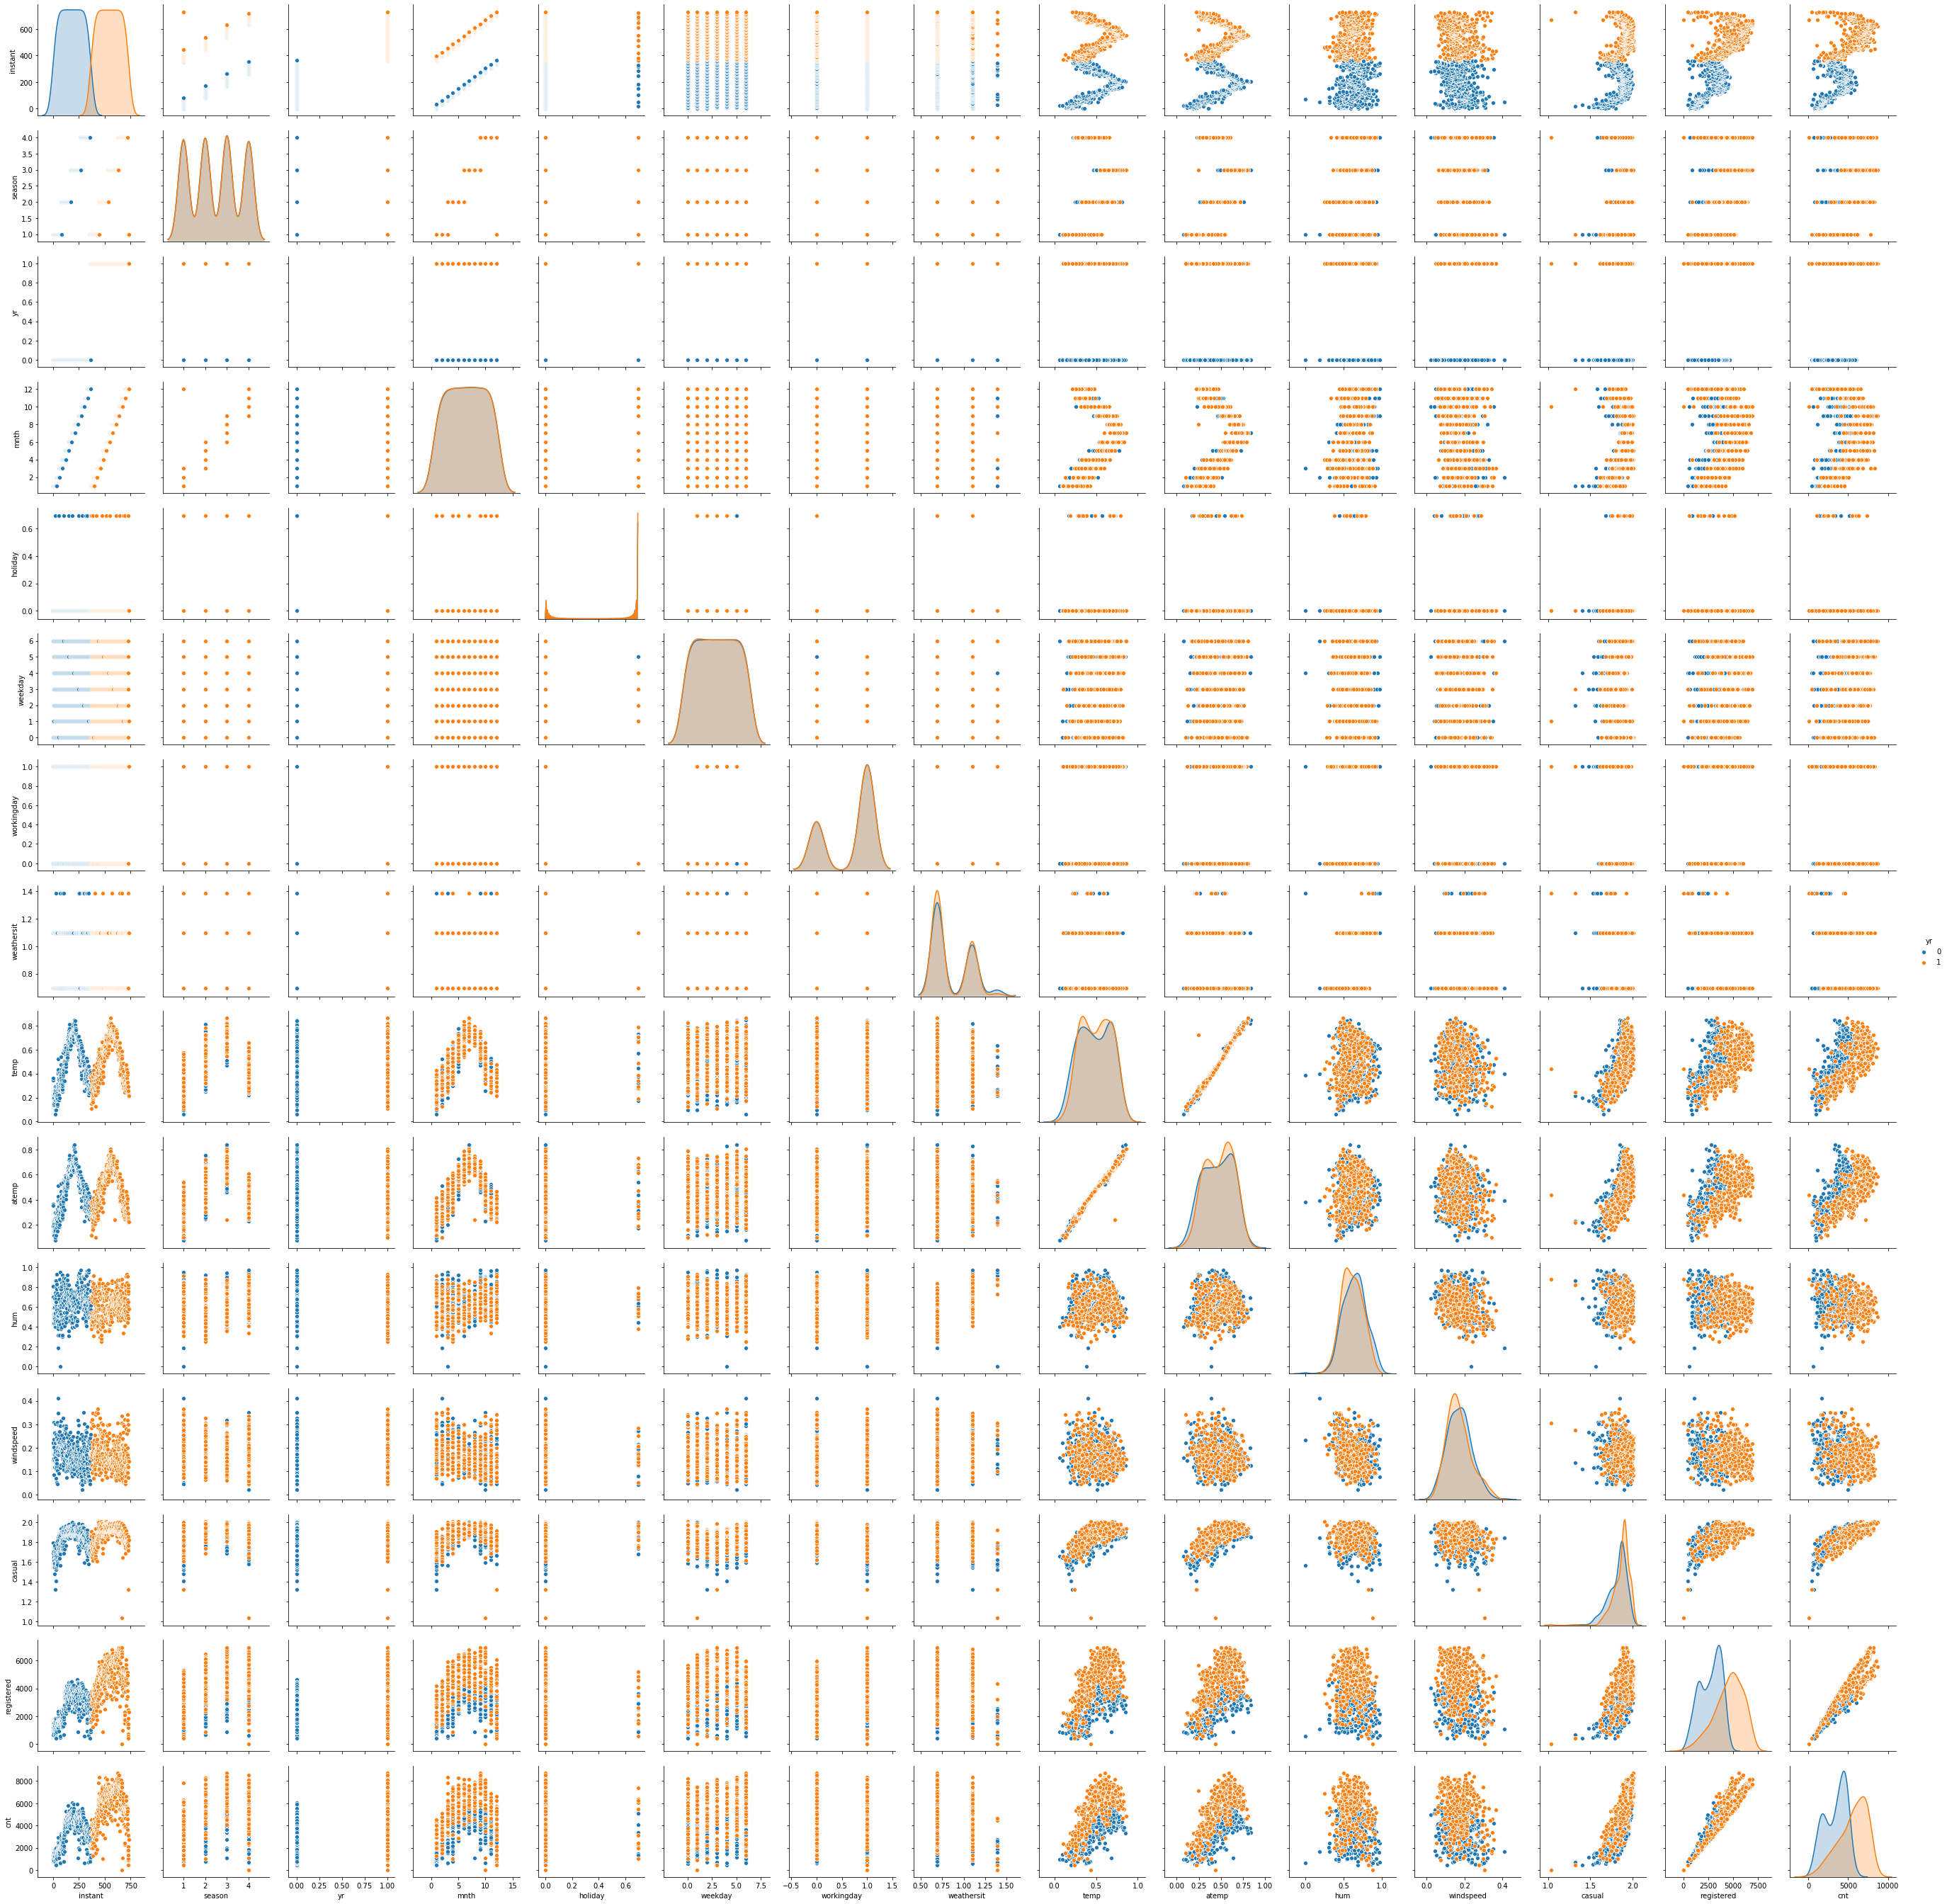

In [28]:
# pair plot to see the scatter of data using year as hue for clear understanding
sns.pairplot(df, hue='yr')

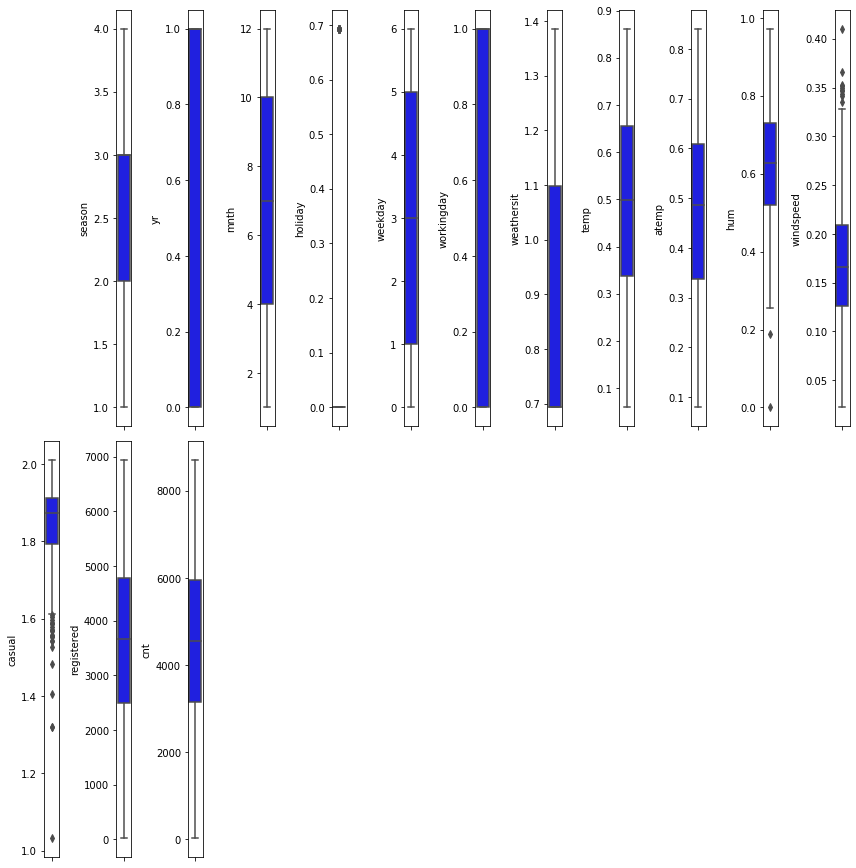

In [29]:
#by  retreving theday using column plot
collist = df.columns.values
ncols=12
nrows=10

plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [30]:
#Lets seperating the x_value and y_value
df

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1      0.0        6         0.0    1.098612   
1          2       1   0     1      0.0        0         0.0    1.098612   
2          3       1   0     1      0.0        1         1.0    0.693147   
3          4       1   0     1      0.0        2         1.0    0.693147   
4          5       1   0     1      0.0        3         1.0    0.693147   
..       ...     ...  ..   ...      ...      ...         ...         ...   
726      727       1   1    12      0.0        4         1.0    1.098612   
727      728       1   1    12      0.0        5         1.0    1.098612   
728      729       1   1    12      0.0        6         0.0    1.098612   
729      730       1   1    12      0.0        0         0.0    0.693147   
730      731       1   1    12      0.0        1         1.0    1.098612   

         temp     atemp       hum  windspeed    casual  registered   cnt  
0    0.344167  0.363625  0.805833   0.148804  1.797232         654   985  
1    0.363478  0.353739  0.696087   0.221974  1.696510         670   801  
2    0.196364  0.189405  0.437273   0.221790  1.686372        1229  1349  
3    0.200000  0.212122  0.590435   0.148675  1.674040        1454  1562  
4    0.226957  0.229270  0.436957   0.171345  1.640978        1518  1600  
..        ...       ...       ...        ...       ...         ...   ...  
726  0.254167  0.226642  0.652917   0.300203  1.766610        1867  2114  
727  0.253333  0.255046  0.590000   0.144508  1.863308        2451  3095  
728  0.253333  0.242400  0.752917   0.117234  1.718503        1182  1341  
729  0.255833  0.231700  0.483333   0.300663  1.806958        1432  1796  
730  0.215833  0.223487  0.577500   0.143967  1.825839        2290  2729  

[731 rows x 15 columns]

In [31]:
x=df.drop('cnt', axis=1)
x

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1      0.0        6         0.0    1.098612   
1          2       1   0     1      0.0        0         0.0    1.098612   
2          3       1   0     1      0.0        1         1.0    0.693147   
3          4       1   0     1      0.0        2         1.0    0.693147   
4          5       1   0     1      0.0        3         1.0    0.693147   
..       ...     ...  ..   ...      ...      ...         ...         ...   
726      727       1   1    12      0.0        4         1.0    1.098612   
727      728       1   1    12      0.0        5         1.0    1.098612   
728      729       1   1    12      0.0        6         0.0    1.098612   
729      730       1   1    12      0.0        0         0.0    0.693147   
730      731       1   1    12      0.0        1         1.0    1.098612   

         temp     atemp       hum  windspeed    casual  registered  
0    0.344167  0.363625  0.805833   0.148804  1.797232         654  
1    0.363478  0.353739  0.696087   0.221974  1.696510         670  
2    0.196364  0.189405  0.437273   0.221790  1.686372        1229  
3    0.200000  0.212122  0.590435   0.148675  1.674040        1454  
4    0.226957  0.229270  0.436957   0.171345  1.640978        1518  
..        ...       ...       ...        ...       ...         ...  
726  0.254167  0.226642  0.652917   0.300203  1.766610        1867  
727  0.253333  0.255046  0.590000   0.144508  1.863308        2451  
728  0.253333  0.242400  0.752917   0.117234  1.718503        1182  
729  0.255833  0.231700  0.483333   0.300663  1.806958        1432  
730  0.215833  0.223487  0.577500   0.143967  1.825839        2290  

[731 rows x 14 columns]

In [32]:
y=df["cnt"]
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [33]:
x.shape

(731, 14)

In [34]:
y.shape

(731,)

In [35]:
y=y.values.reshape(-1,1)

In [36]:
y

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321],
       [1263],
       [1162],
       [1406],
       [1421],
       [1248],
       [1204],
       [1000],
       [ 683],
       [1650],
       [1927],
       [1543],
       [ 981],
       [ 986],
       [1416],
       [1985],
       [ 506],
       [ 431],
       [1167],
       [1098],
       [1096],
       [1501],
       [1360],
       [1526],
       [1550],
       [1708],
       [1005],
       [1623],
       [1712],
       [1530],
       [1605],
       [1538],
       [1746],
       [1472],
       [1589],
       [1913],
       [1815],
       [2115],
       [2475],
       [2927],
       [1635],
       [1812],
       [1107],
       [1450],
       [1917],
       [1807],
       [1461],
       [1969],
       [2402],
       [1446],
       [1851],
       [2134],
       [1685],
       [1944],
       [2077],
       [ 605],
       [1872],
       [21

In [37]:
y.shape

(731, 1)

In [38]:
from sklearn.model_selection import train_test_split
train_x,train_y,test_x,test_y=train_test_split(x,y,test_size=.33,random_state=39)

In [39]:
train_x.shape

(489, 14)

In [40]:
train_y.shape

(242, 14)

In [41]:
test_x.shape

(489, 1)

In [42]:
test_y.shape

(242, 1)

In [43]:
# standardizes the data in x using standerd scaler technique
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [44]:
#creating models array with all the model, along with few blank array for further use
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
Model_array=[]
Random_state=[]
Max_r2score_array=[]
Cross_val_score_array=[]
Standard_Deviation=[]
Models=[('Ridge',Ridge()),('Lasso',Lasso()),('ElasticNet',ElasticNet()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('SGDRegressor',SGDRegressor()),('LinearRegression',LinearRegression()),('KNeighborsRegressor',KNeighborsRegressor()),
        ('DecisionTreeRegressor', DecisionTreeRegressor())]

In [45]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [46]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x,y,cv=kf)
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [47]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

Model  R2 score  Random state
3  RandomForestRegressor  0.996973            29
7  DecisionTreeRegressor  0.992391            88
1                  Lasso  0.978109            44
5       LinearRegression  0.978055            44
4           SGDRegressor  0.977998            31
0                  Ridge  0.977902            44
2             ElasticNet  0.946216            61
6    KNeighborsRegressor  0.936821            59

In [48]:
# comparing the performances of all the model on crossval basis
from sklearn.metrics import mean_squared_error,mean_absolute_error
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

Model  Cross val Acuracy  Standard Deviation
3  RandomForestRegressor           0.959759            0.022621
7  DecisionTreeRegressor           0.901235            0.097242
1                  Lasso           0.735225            0.365097
5       LinearRegression           0.733681            0.366172
0                  Ridge           0.732247            0.369308
4           SGDRegressor           0.729472            0.373028
2             ElasticNet           0.522127            0.309378
6    KNeighborsRegressor           0.053268            0.899995

In [49]:
#Since R2 score obtained by RandomForestRegressor is 0.9969 and mean of cross val accuracy is RandomForestRegressor 0.9599
#It is quite evident that the diffrence is least between r2 score and cross val score for this model.
#which prove that model is perfect fit.

rfr=RandomForestRegressor(random_state=5)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=62,shuffle=True)
rfr.fit(train_x,train_y)
pred=rfr.predict(test_x)
score=cross_val_score(rfr,train_x,train_y,cv=14).mean()

print('Model score',rfr.score(train_x,train_y),'\n')
print('R2 score of model is :' ,r2_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model :',score,'\n')
print('Mean absolute error for model : ',mean_absolute_error(test_y,pred),'\n')
print('Mean squared error for model : ',mean_squared_error(test_y,pred),'\n')
print('Root mean squared error for model : ',np.sqrt(mean_squared_error(test_y,pred)),'\n')

Model score 0.9988312181041624 

R2 score of model is : 0.9949029583327239 

The mean of cross_val_score for the model : 0.9935163847665315 

Mean absolute error for model :  83.36734693877553 

Mean squared error for model :  18407.563265306126 

Root mean squared error for model :  135.67447536403495 



In [52]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 4_Bike_Sharing.csv')

In [53]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(rfr,'Bike_Sharing.pkl')

['Bike_Sharing.pkl']